# Dask
Dask is good for distributing computation over multiple machines, similar to MPI, but with some added features. Dask's main three features are:

1. Dask Arrays
2. Dask DataFrames
3. Dask Bags

These can be thought of as distributed extensions of the Numpy Array, Pandas DataFrame, and generic Python objects like dictionaries. Any computation you do with Dask objects will automatically be run in parallel over the the processors accessible to your computer.

First, we start the Dask Client, which automatically gathers available processors and pools their threads.

In [1]:
from dask.distributed import Client
client = Client(n_workers=1) # one worker organizes all tasks across all available threads in the thread pool
client

Client Scheduler: tcp://127.0.0.1:58664 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 8 Memory: 17.18 GB


Note: There are versions for SLURM and other cluster schedulers as well, but this one is running locally. In short, workers reserve a pool of threads. Workers perform processes (don't share memory) as requested by the scheduler, and threads (do share memory) perform tasks required by a process. Communication between threads is easy because the thread pool managed by a worker has shared memory, whereas communication between workers is upon request and between memory partitions (as initialized with the Client). Here, we request one worker to manage all available threads and share all available memory, because we only have one process to manage, and it can benefit from as much shared memory/multi-threading as possible.

Then, we define a random array of a certain size, similar to how Numpy would do this. But, this array can be larger than available memory.

In [2]:
import dask.array as da
n = 5*10**4
x = da.random.random((n,n),chunks=(0.2*n,0.2*n)) # no calculations here
x # or here

dask.array<random_sample, shape=(50000, 50000), dtype=float64, chunksize=(10000, 10000), chunktype=numpy.ndarray>

Note: these are large chunks. The general rule is to shoot for 10^6 elements per chunk, where these are 10^8. I did this to make the computation graph somewhat legible.

We define a computation:

In [3]:
y = x + x.T - x.max(axis=0) # no calculations have been done yet, they have just been added to the task graph
y # no calculations here either, just displaying the info about the array

dask.array<sub, shape=(50000, 50000), dtype=float64, chunksize=(10000, 10000), chunktype=numpy.ndarray>

Dask computes lazily, so it won't do any computation until told to (with the .compute() or .persist() methods). We can define computations and then look at their order of operations:

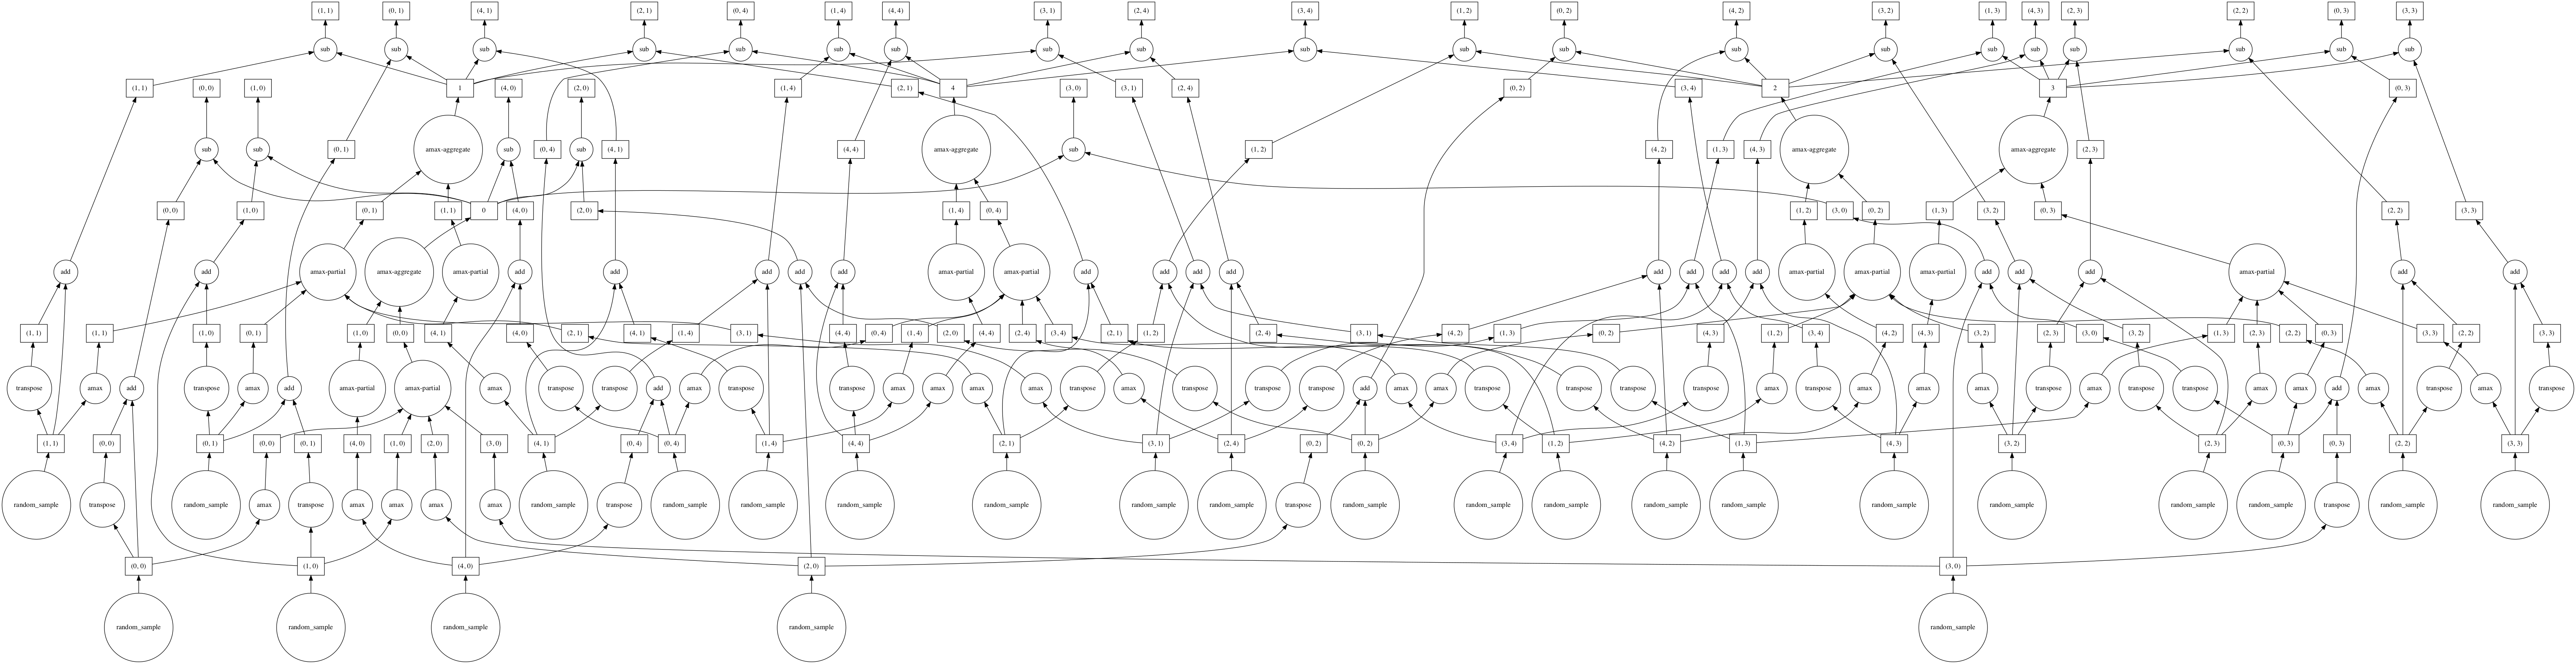

In [4]:
y.visualize() # still hasn't done any calculations

In [5]:
y = y.persist() # does the calculation, persists the result in memory
y # display resulting dimensions

dask.array<sub, shape=(50000, 50000), dtype=float64, chunksize=(10000, 10000), chunktype=numpy.ndarray>